In [1]:
!pip install pydotplus

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]
0.701963474235
0.739209465832
[[  1 148]
 [  0  82]]
             precision    recall  f1-score   support

          0       1.00      0.01      0.01       149
          1       0.36      1.00      0.53        82

avg / total       0.77      0.36      0.20       231

0.730165809034


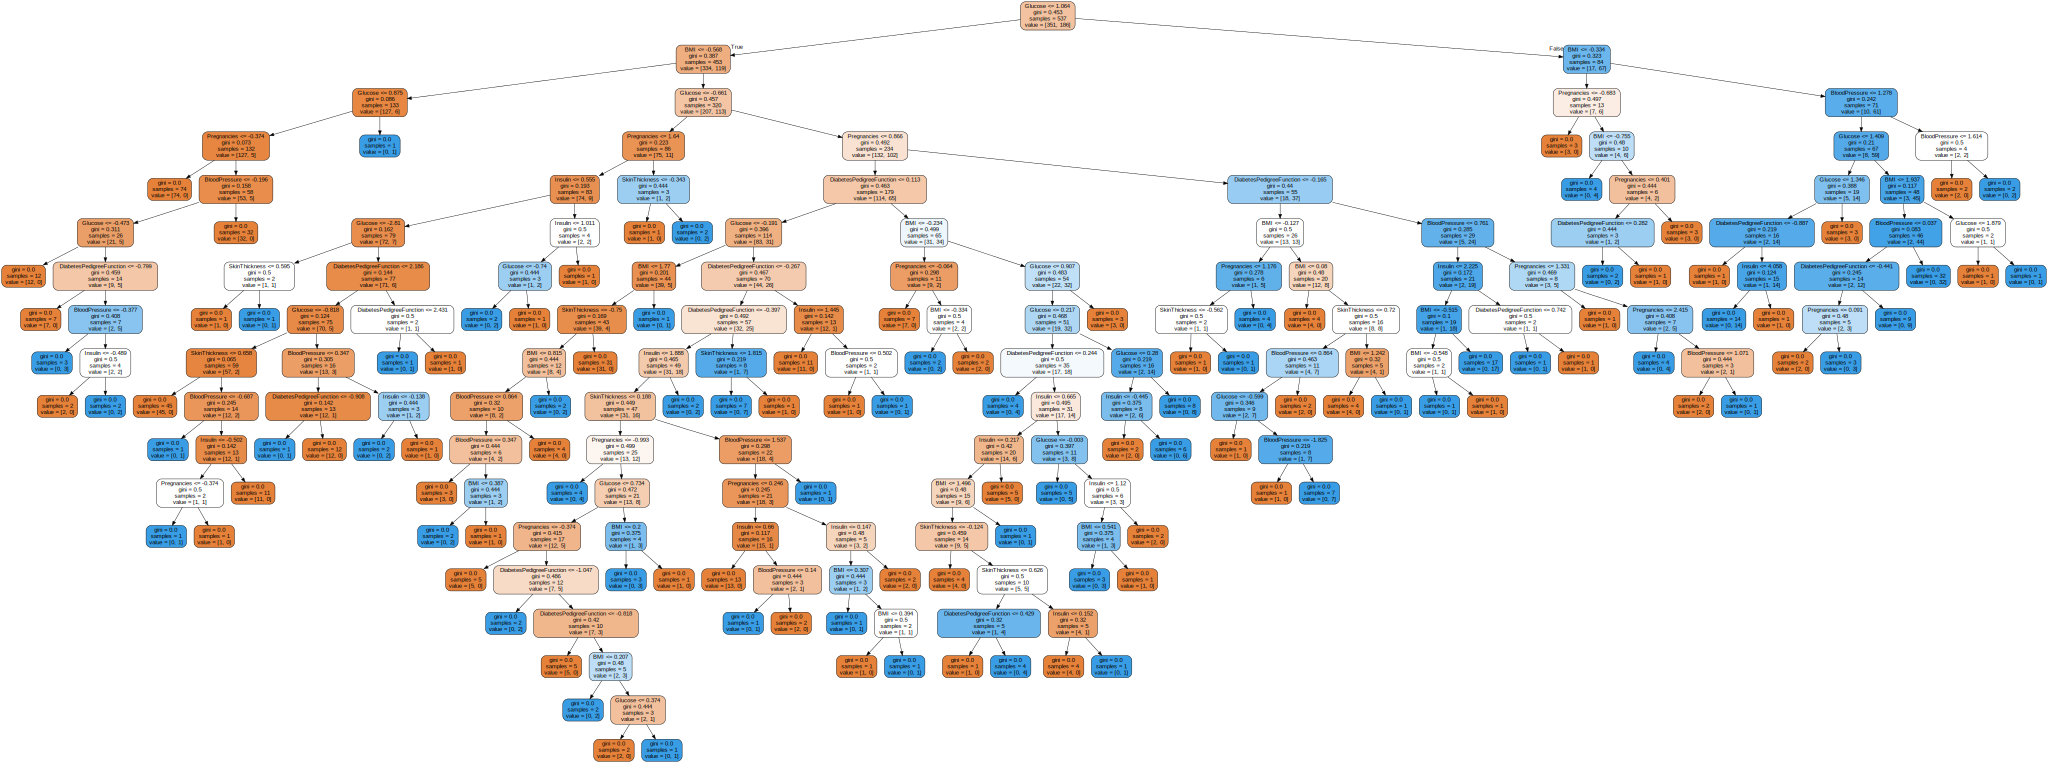

In [8]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from IPython.display import Image
from IPython.display import SVG

from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import display
#import pydotplus
from sklearn.metrics import confusion_matrix,accuracy_score,\
    classification_report

filename = 'F:/MachineLearning/FTSamples-PR/RSamples/diabetes.csv'
data = pd.read_csv(filename)
#print(list(data))

X = data.iloc[:, 0:7]
y = data.iloc[:, 8]

#print(X)
features = list(data.columns[:7])
print(features)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.3)
model = DecisionTreeClassifier()
scaler = StandardScaler().fit(x_train)
X_train_scaled = scaler.transform(x_train)
#model.fit(x_train, y_train)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(x_test)
print(y_pred)
names = ["Decision Tree", "Random Forest"]

classifiers = [
    DecisionTreeClassifier(criterion = 'entropy'),
    RandomForestClassifier(criterion = 'entropy'),
    ]
results = {}
for name, clf in zip(names, classifiers):
    scores = cross_val_score(clf, x_train, y_train, cv=5)
    print(scores.mean())
    results[name] = scores
#checking the model with the best accuracy
# for name, scores in results.items():
#     print("%20s | Accuracy: %0.2f%% (+/- %0.2f%%)" % (name, 100*scores.mean(), 100*scores.std() * 2))

cm = confusion_matrix(y_test,y_pred)
print(cm)
label = ["0","1"]
# sns.heatmap(cm, annot=True, xticklabels=label, yticklabels=label)
print(classification_report(y_test,y_pred))
#print(accuracy_score(y_test,y_pred))

accuracies = cross_val_score(estimator = clf, X = x_train, y = y_train,
                             cv = 10)
print(accuracies.mean())

export_graphviz(model, out_file = 'F:/MachineLearning/diabetes.png', feature_names=features,
                class_names=['0','1'], filled=True,
                rounded=True, special_characters=True)
dotdata = export_graphviz(model, feature_names=features, out_file= None, filled = True, rounded=True)
#graph = pydotplus.graph_from_dot_data (dotdata)
#Image(graph.create_png())
#graph.write_png("dtree.png")
graph = Source(export_graphviz(model, feature_names=features, out_file= None, filled = True, rounded=True))
display(SVG(graph.pipe(format='svg')))